In [ ]:
!nvidia-smi

Mon Oct 23 02:34:14 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install git+https://github.com/huggingface/diffusers.git
!pip install transformers scipy ftfy
!pip install "ipywidgets>=7,<8"

  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-20fbw_y6
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-20fbw_y6
  Resolved https://github.com/huggingface/diffusers.git to commit bc7a4d4917456afd70913be85bd25c556c25862c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.3 MB/s eta 0:00:00
  Created wheel for diffusers: filename=diffusers-0.22.0.dev0-py3-none-any.whl size=1577476 sha256=104016286fa61572569468b2aa2461848ec160d6eda4fff0e9ca640ff8474d81
  Stored in directory: /tmp/pip-ephem-wheel-cache-v5xbrroy/wheels/4d/b7/a8/6f9549ceec5daad78675b857ac57d697c387062506520a7b50
Successfully built diffusers
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 32.7 MB

In [ ]:
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 6.4 MB/s eta 0:00:00


In [ ]:
from accelerate import Accelerator
from diffusers import StableDiffusionPipeline
from IPython.display import Image
import torch

accelerator = Accelerator()

model_id = "proximasanfinetuning/luna-diffusion-v2.5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = accelerator.prepare(pipe.to("cuda"))

safety_checker/model.safetensors not found


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [ ]:
!pip install replicate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.2 MB/s eta 0:00:00


In [ ]:
import os
import replicate

os.environ["REPLICATE_API_TOKEN"] = "r8_3jqPnNZGaUOOOb1rKfRdWoiX3Udz7nf0BY8VF"

# Define functions for each action
product = input("Enter product(s): ")
style = input("Enter style: ")
background = input("Enter background: ")
additional_elements = input("Enter additional elements: ")

# Generate the prompt
prompt = f"product(s): {product}. Style: {style}. Background: {background}. Additional elements: {additional_elements}"

# Here you can use 'prompt' to interact with DALL·E to generate the poster
print("User prompt:", prompt)



Enter product(s): Cocacola
Enter style: Simple
Enter background: Red and white
Enter additional elements: Fresh
User prompt: product(s): Cocacola. Style: Simple. Background: Red and white. Additional elements: Fresh


In [ ]:
llama_instruction = "Rewrite the entire phrase with their synonyms in a single line"

# Generate LLM response
output = replicate.run('a16z-infra/llama13b-v2-chat:df7690f1994d94e96ad9d568eac121aecf50684a0b0963b25a41cc40061269e5',
                        input={"prompt": f"{llama_instruction}: {prompt}",
                        "temperature": 0.1, "top_p": 0.5, "max_length": 512, "repetition_penalty": 1})

# Extract and print the desired response
output_text = "".join(output)

# Find the starting point of the relevant text
key_phrase = "Here's the rewritten phrase with their synonyms in a single line:"
start_index = output_text.find(key_phrase)
print(len(key_phrase))
llama_prompt = output_text[start_index+len(key_phrase)+2:]

print("Llama prompt:",llama_prompt)

65
Llama prompt: product(s): Coca-Cola. Style: Uncomplicated. Background: Scarlet and ivory. Additional elements: Novelty, enjoyment, and thrill.


  0%|          | 0/50 [00:00<?, ?it/s]

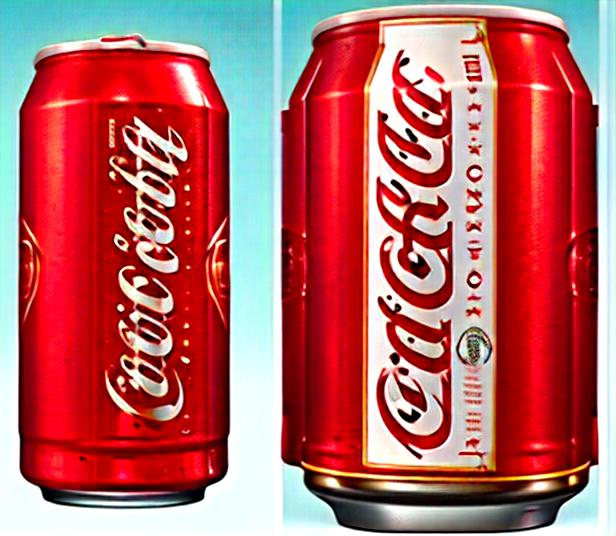

  0%|          | 0/50 [00:00<?, ?it/s]

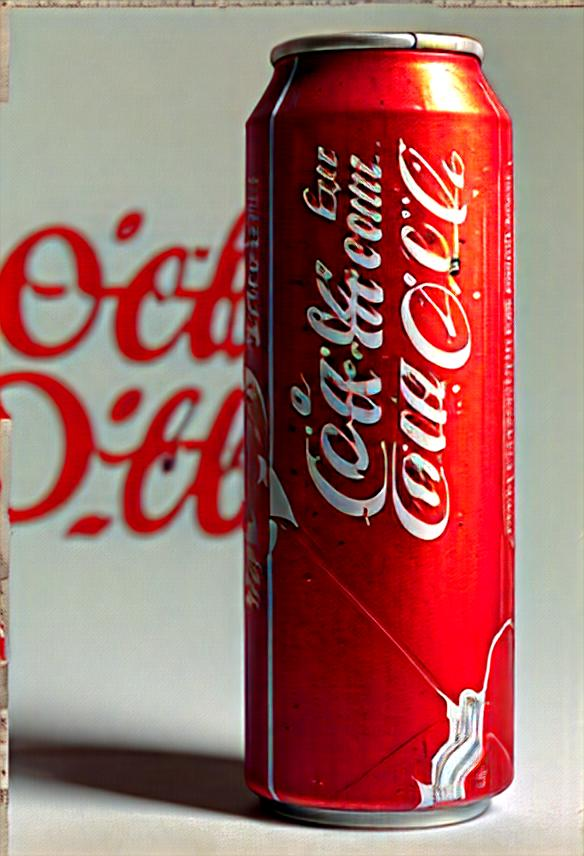

In [ ]:
import random

n = 4
for i in range(1,n+1):
  if i < n/2:
    PROMPT = prompt
  else:
    PROMPT = llama_prompt
  h = random.randint(64, 128)
  w = random.randint(64, 128)
  image = pipe(PROMPT, height=8*h, width=8*w).images[0]
  image.save("./result"+str(i)+".jpg")
  display(Image(filename="./result"+str(i)+".jpg"))
